### Case study for a sales company

In [63]:
# loading libraries and reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style="white")

# read data
market_df = pd.read_csv("market_fact.csv")
customer_df = pd.read_csv("cust_dimen.csv")
product_df = pd.read_csv("prod_dimen.csv")
shipping_df = pd.read_csv("shipping_dimen.csv")
orders_df = pd.read_csv("orders_dimen.csv")


In [64]:
market_df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


### Boxplots

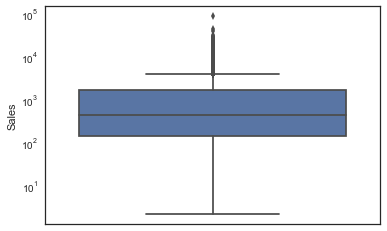

In [65]:
sns.boxplot(y = market_df['Sales'])
plt.yscale('log')
plt.show()

To **compare the (distribution of) sales of various product categories**. Let's first merge the product data into the main dataframe.

In [66]:
product_df.head()

,Product_Category,Product_Sub_Category,Prod_id
0,OFFICE SUPPLIES,STORAGE & ORGANIZATION,Prod_1
1,OFFICE SUPPLIES,APPLIANCES,Prod_2
2,OFFICE SUPPLIES,BINDERS AND BINDER ACCESSORIES,Prod_3
3,TECHNOLOGY,TELEPHONES AND COMMUNICATION,Prod_4
4,FURNITURE,OFFICE FURNISHINGS,Prod_5


df = pd.merge(market_df,product_df, how = 'inner', on='Prod_id')
df.head()

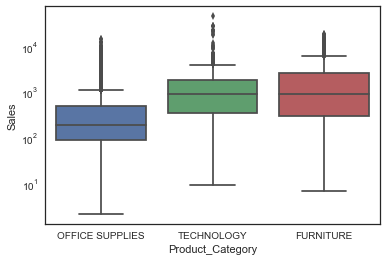

In [67]:
sns.boxplot(x=df['Product_Category'], y=df['Sales'])
plt.yscale('log')
plt.show()

The sales of Office supplies is lesser than the other 2 categories

Next, comparing as per the profits

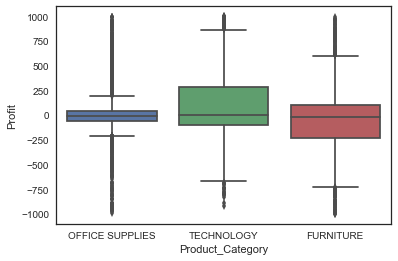

In [68]:
sns.boxplot(x=df['Product_Category'], y=df['Profit'])
#plt.yscale('log')
plt.show()

Since the values are going extreme, we can remove some values by setting up a limit

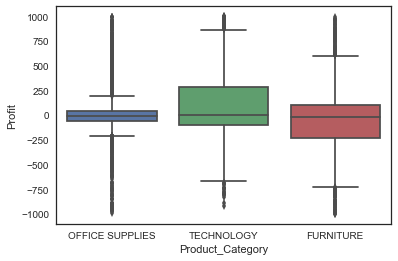

In [70]:
df = df[(df.Profit<1000) & (df.Profit>-1000)]

# boxplot of a variable across various product categories
sns.boxplot(x=df['Product_Category'], y=df['Profit'])
plt.show()

Here we can see that, Furniture category is not contributing much towards the profit side even though it had high number of sales made. It has more percentage of loss occurred

Lets compare the two factors side by side by using the concept of subplots

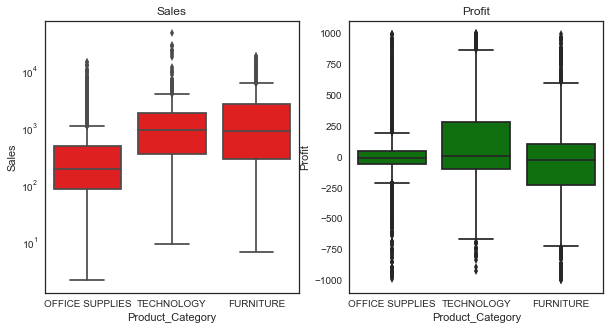

In [71]:
plt.figure(1)
plt.figure(figsize=(10,5))

#subplot1
plt.subplot(1,2,1)
sns.boxplot(x=df['Product_Category'], y =df['Sales'],color='r')
plt.yscale('log')
plt.title('Sales')

#subplot2
plt.subplot(1,2,2)
sns.boxplot(x=df['Product_Category'], y =df['Profit'], color='g')
plt.title('Profit')
plt.show()

Now we drill down into other categorical data in the dataset....i.e Customer segment since Customers play a major role in marketing sales

In [72]:
df=pd.merge(df,customer_df, how='inner', on='Cust_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,...,Region_x,Customer_Segment_x,Customer_Name_y,Province_y,Region_y,Customer_Segment_y,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,...,WEST,CORPORATE,AARON BERGMAN,ALBERTA,WEST,CORPORATE,AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,...,WEST,CORPORATE,AARON BERGMAN,ALBERTA,WEST,CORPORATE,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,...,WEST,CORPORATE,AARON BERGMAN,ALBERTA,WEST,CORPORATE,AARON BERGMAN,ALBERTA,WEST,CORPORATE
3,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,...,WEST,CORPORATE,AARON BERGMAN,ALBERTA,WEST,CORPORATE,AARON BERGMAN,ALBERTA,WEST,CORPORATE
4,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,...,ONTARIO,HOME OFFICE,AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE,AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE


Profit distribution acquired from different customer_segments

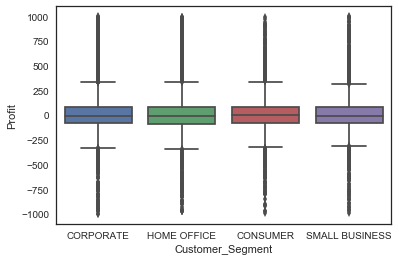

In [74]:
sns.boxplot(x=df['Customer_Segment'], y=df['Profit'])
plt.show()

In order to differentiate it more as per customer_segment and the product category, we use the **hue** keyword in boxplot

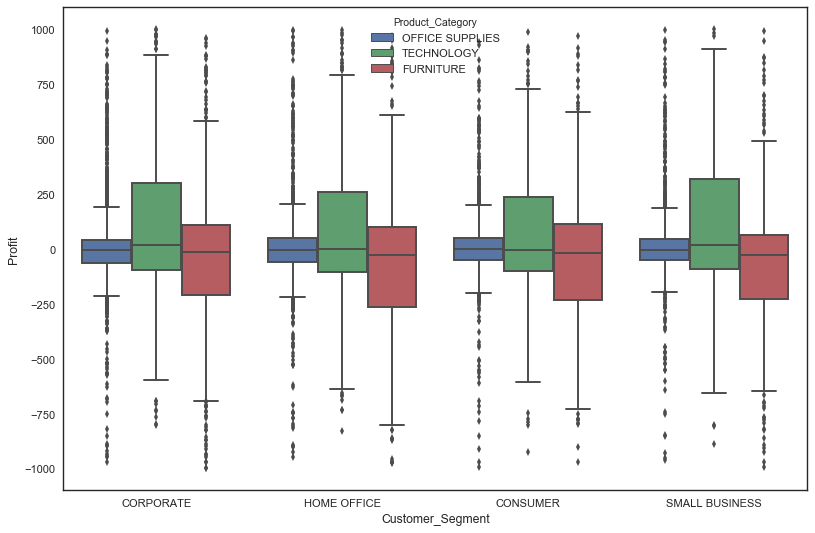

In [76]:
#need a bigger figure size to fit
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.boxplot(x=df['Customer_Segment'], y=df['Profit'],hue=df['Product_Category'])
plt.show()

Across all customer segments, the product category ```Technology``` seems to be doing fairly well, though ```Furniture``` is incurring losses across all segments. 

To understand why some are making huge loss ,one of our hypothesis is that the *shipping cost is too high in some orders*. We can **plot derived variables** as well, such as *shipping cost as percentage of sales amount*.  

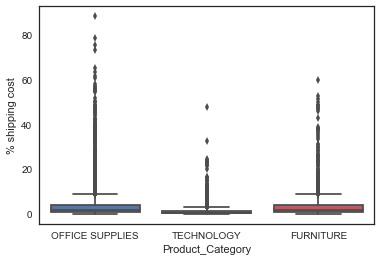

In [77]:
sns.boxplot(x=df['Product_Category'], y=100*df['Shipping_Cost']/df['Sales'])
plt.ylabel('% shipping cost')
#plt.yscale('log')
plt.show()

## Plotting Aggregated Values across Categories


### Bar Plots - Mean, Median and Count Plots


Bar plots are used to **display aggregated values** of a variable, rather than entire distributions. This is especially useful when you have a lot of data which is difficult to visualise in a single figure. 

For example, say you want to visualise and *compare the average Sales across Product Categories*. The ```sns.barplot()``` function can be used to do that.


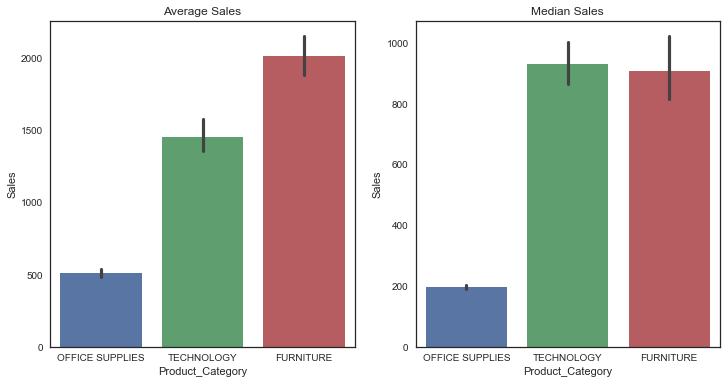

In [79]:
# Create 2 subplots for mean and median respectively

# increase figure size 
plt.figure(figsize=(12, 6))

# subplot 1: statistic=mean
plt.subplot(1, 2, 1)
sns.barplot(x=df['Product_Category'], y=df['Sales'])
plt.title("Average Sales")

# subplot 2: statistic=median
plt.subplot(1, 2, 2)
sns.barplot(x=df['Product_Category'], y=df['Sales'], estimator=np.median)
plt.title("Median Sales")

plt.show()


The mean and median sales across the product categories tell different stories. This is because of some outliers (extreme values) in the ```Furniture``` category, distorting the value of the mean.

### Barplot

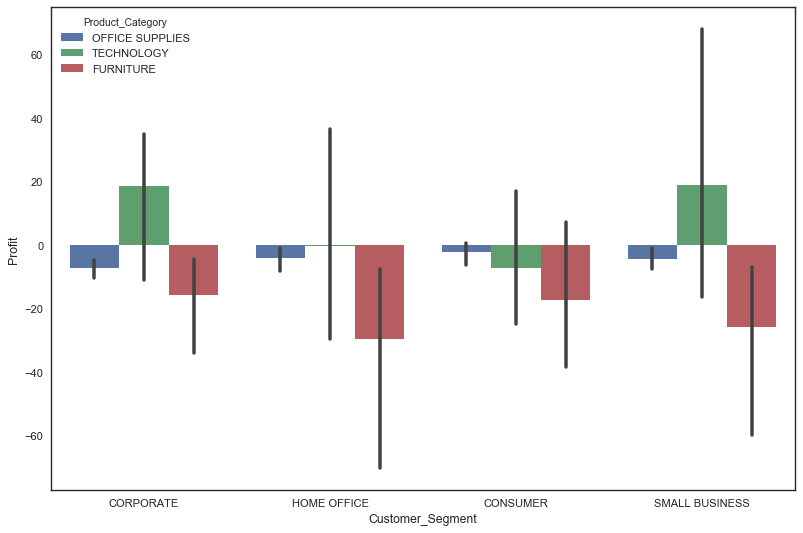

In [80]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x=df['Customer_Segment'], y=df['Profit'], hue=df['Product_Category'], estimator=np.median)
plt.show()

The plot neatly shows the median profit across product categories and customer segments. It says that:
- On an average, only Technology products in Small Business and Corporate (customer) categories are profitable.
- Furniture is incurring losses across all Customer Segments

When you want to visualise having a large number of categories, it is helpful to plot the categories across the y-axis. Let's now *drill down into product sub categories*. 

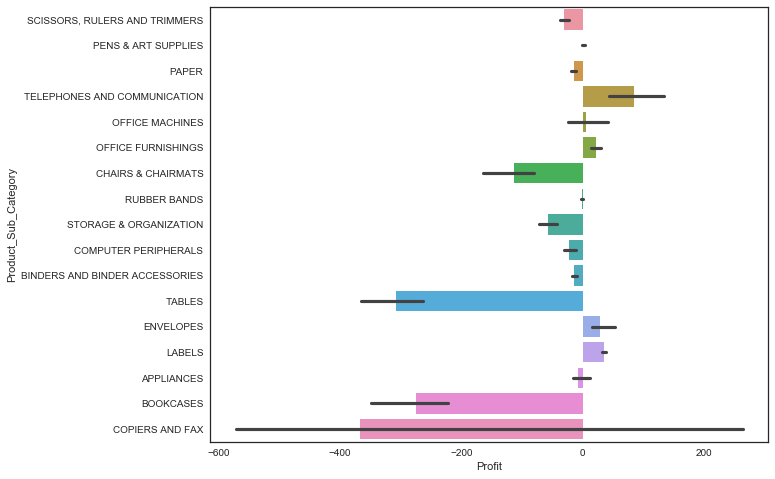

In [81]:
# Plotting categorical variable across the y-axis
plt.figure(figsize=(10, 8))
sns.barplot(x=df['Profit'], y=df["Product_Sub_Category"], estimator=np.median)
plt.show()

**count of the observations** across categorical variables using ```sns.countplot()```.

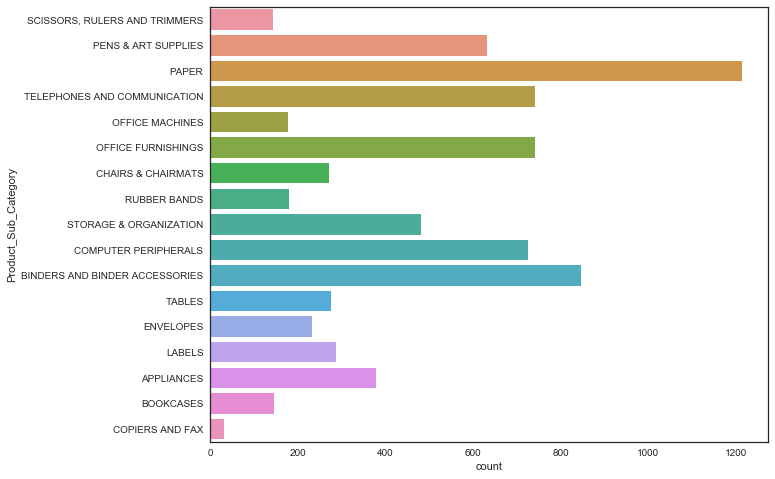

In [82]:
# Plotting count across a categorical variable 
plt.figure(figsize=(10, 8))
sns.countplot(y=df["Product_Sub_Category"])
plt.show()

Note the most loss making category - Copiers and Fax - has a very few number of orders. 

## Time series

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style="white")

# read data
market_df = pd.read_csv("C:\\Users\\gauri\\OneDrive\\Documents\\Extra\\Machine Learning Kaggle course\\7_DataVisualization\\Datavisual\\Datavisual\\global_sales_data\\market_fact.csv")
customer_df = pd.read_csv("C:\\Users\\gauri\\OneDrive\\Documents\\Extra\\Machine Learning Kaggle course\\7_DataVisualization\\Datavisual\\Datavisual\\global_sales_data\\cust_dimen.csv")
product_df = pd.read_csv("C:\\Users\\gauri\\OneDrive\\Documents\\Extra\\Machine Learning Kaggle course\\7_DataVisualization\\Datavisual\\Datavisual\\global_sales_data\\prod_dimen.csv")
shipping_df = pd.read_csv("C:\\Users\\gauri\\OneDrive\\Documents\\Extra\\Machine Learning Kaggle course\\7_DataVisualization\\Datavisual\\Datavisual\\global_sales_data\\shipping_dimen.csv")
orders_df = pd.read_csv("C:\\Users\\gauri\\OneDrive\\Documents\\Extra\\Machine Learning Kaggle course\\7_DataVisualization\\Datavisual\\Datavisual\\global_sales_data\\orders_dimen.csv")


Here we will merge the orders dataframe with market dataframe in order to demonstrate timeseries

In [3]:
# merging with the Orders data to get the Date column
df = pd.merge(market_df, orders_df, how='inner', on='Ord_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,27-07-2010,NOT SPECIFIED
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,27-07-2010,NOT SPECIFIED
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,27-07-2010,NOT SPECIFIED
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,07-07-2009,HIGH
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,09-11-2010,MEDIUM


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 13 columns):
Ord_id                 8399 non-null object
Prod_id                8399 non-null object
Ship_id                8399 non-null object
Cust_id                8399 non-null object
Sales                  8399 non-null float64
Discount               8399 non-null float64
Order_Quantity         8399 non-null int64
Profit                 8399 non-null float64
Shipping_Cost          8399 non-null float64
Product_Base_Margin    8336 non-null float64
Order_ID               8399 non-null int64
Order_Date             8399 non-null object
Order_Priority         8399 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 918.6+ KB


We notice that the order_date column is in ```string``` format and so we convert it into ```date_time``` format

In [7]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 13 columns):
Ord_id                 8399 non-null object
Prod_id                8399 non-null object
Ship_id                8399 non-null object
Cust_id                8399 non-null object
Sales                  8399 non-null float64
Discount               8399 non-null float64
Order_Quantity         8399 non-null int64
Profit                 8399 non-null float64
Shipping_Cost          8399 non-null float64
Product_Base_Margin    8336 non-null float64
Order_ID               8399 non-null int64
Order_Date             8399 non-null datetime64[ns]
Order_Priority         8399 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 918.6+ KB


After looking at the data, we notice that multiple orders were processed in 1 day and so we aggregate the ```Sales``` as per the date and then create a time series plot

In [9]:
time_df = df.groupby('Order_Date')['Sales'].sum()

In [11]:
time_df.head()

Order_Date
2009-01-01    1052.8400
2009-01-02    5031.9000
2009-01-03    7288.1375
2009-01-04    6188.4245
2009-01-05    2583.3300
Name: Sales, dtype: float64

To plot the time series graph, we use **sns.tsplot()**

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


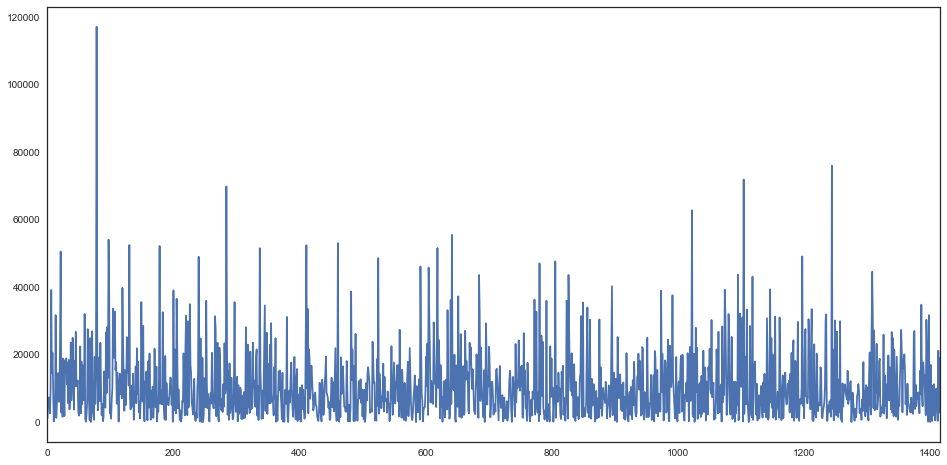

In [13]:
# figure size
plt.figure(figsize=(16, 8))

# tsplot
sns.tsplot(data=time_df)
plt.show()

### Using Derived Date Metrics for Visualisation

We can use derived variables from date such as month and year and use them to identify hidden patterns.

In [14]:
# extracting month and year from date
# extract month
df['month'] = df['Order_Date'].dt.month

# extract year
df['year'] = df['Order_Date'].dt.year

df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority,month,year
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,2010-07-27,NOT SPECIFIED,7,2010
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,2010-07-27,NOT SPECIFIED,7,2010
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,2010-07-27,NOT SPECIFIED,7,2010
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,2009-07-07,HIGH,7,2009
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,2010-09-11,MEDIUM,9,2010


In [18]:
# grouping by year and month
df_time = df.groupby(["year", "month"]).Sales.mean()
df_time.head(20)

year  month
2009  1        1898.475090
      2        2116.510723
      3        2258.661599
      4        2374.155868
      5        1922.317055
      6        1548.093259
      7        1909.084469
      8        1827.095921
      9        1717.295494
      10       2203.961070
      11       1502.192743
      12       2209.047484
2010  1        1549.664361
      2        1591.532297
      3        1708.934944
      4        1461.935539
      5        1440.393540
      6        1695.397085
      7        1272.653408
      8        1277.917503
Name: Sales, dtype: float64

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


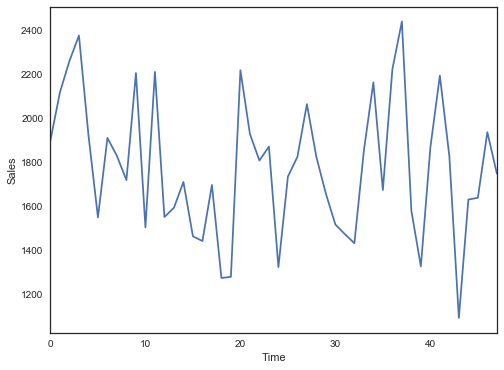

In [16]:
plt.figure(figsize=(8, 6))
# time series plot
sns.tsplot(df_time)
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()

Another way to visualise numeric variables, such as ```Sales```, across the year and month. We can pivot the ```month``` column to create a wide-format dataframe, and then plot a heatmap.


In [19]:
# Pivoting the data using 'month' 
year_month = pd.pivot_table(df, values='Sales', index='year', columns='month', aggfunc='mean')
year_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2009,1898.475090,2116.510723,2258.661599,2374.155868,1922.317055,1548.093259,1909.084469,1827.095921,1717.295494,2203.961070,1502.192743,2209.047484
2010,1549.664361,1591.532297,1708.934944,1461.935539,1440.393540,1695.397085,1272.653408,1277.917503,2216.599136,1927.250907,1806.324648,1869.720956
2011,1321.671562,1733.378070,1822.860614,2062.716921,1822.033936,1655.599644,1515.576260,1471.700741,1430.616748,1851.404564,2161.479056,1672.187881
2012,2220.831551,2438.166961,1578.284028,1325.253694,1865.744629,2192.228263,1824.935942,1090.950643,1628.963780,1636.951775,1935.183039,1747.047528


You can now create a heatmap using ```sns.heatmap()```.

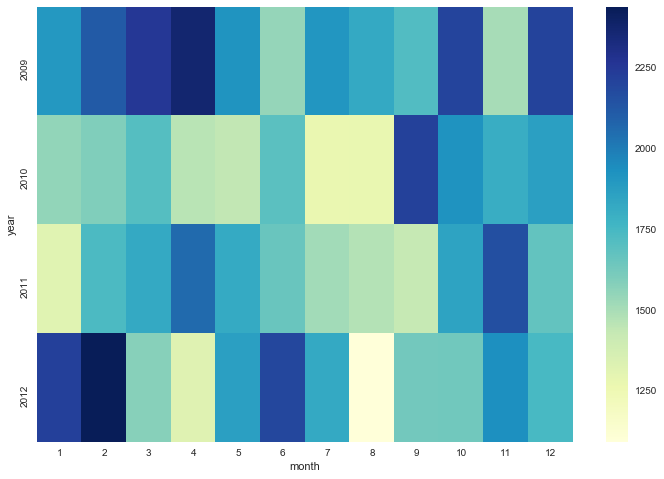

In [20]:
# figure size
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(year_month, cmap="YlGnBu")
plt.show()